<a href="https://colab.research.google.com/github/jessystem/Fitness_Tracker-/blob/main/FITNESS_TRACKER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1️⃣ Exploração Inicial

- importação das bibliotecas e leitura do arquivo

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fitness_tracker = pd.read_csv('/content/Fitness_Tracker_Data.csv')

Estrutura da base

In [4]:
fitness_tracker.head()

,User_ID,Date,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type
0,4001,2024-01-01,14748,68,598,Cardio
1,4002,2024-01-02,8943,74,428,Cardio
2,4003,2024-01-03,14195,69,724,NaN
3,4004,2024-01-04,7963,97,284,Strength
4,4005,2024-01-05,14671,93,622,Yoga


In [5]:
fitness_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_ID          100 non-null    int64 
 1   Date             100 non-null    object
 2   Steps            100 non-null    int64 
 3   Heart_Rate_avg   100 non-null    int64 
 4   Calories_Burned  100 non-null    int64 
 5   Workout_Type     79 non-null     object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [6]:
fitness_tracker.describe()

,User_ID,Steps,Heart_Rate_avg,Calories_Burned
count,100.000000,100.00000,100.000000,100.000000
mean,4050.500000,8455.22000,79.690000,473.640000
std,29.011492,4157.31053,10.370602,181.639588
min,4001.000000,1000.00000,61.000000,160.000000
25%,4025.750000,4855.00000,70.000000,304.500000
50%,4050.500000,8681.50000,80.000000,488.500000
75%,4075.250000,11662.00000,89.000000,623.250000
max,4100.000000,14972.00000,99.000000,795.000000


###2️⃣ Limpeza e Tratamento de Dados

Verificar valores ausentes e tratá-los.

In [25]:
#valores nulos por coluna
print(fitness_tracker.isnull().sum())
numeric_cols = fitness_tracker.select_dtypes(include=['number'])
mean_values = numeric_cols.mean()
fitness_tracker[numeric_cols.columns] = fitness_tracker[numeric_cols.columns].fillna(mean_values)


User_ID             0
Date                0
Steps               0
Heart_Rate_avg      0
Calories_Burned     0
Workout_Type       21
Week                0
Day_of_Week         0
dtype: int64


Correção da data

In [8]:
fitness_tracker['Date'] = pd.to_datetime(fitness_tracker['Date'])

## 3️⃣ Análises Estatísticas

In [9]:
soma_calorias_por_treino = fitness_tracker.groupby('Workout_Type')['Calories_Burned'].sum()

# treino que mais queimou calorias
treino_mais_eficiente = soma_calorias_por_treino.idxmax()
calorias_maximas = soma_calorias_por_treino.max()

print(f"O treino que mais queimou calorias foi: {treino_mais_eficiente}, com {calorias_maximas} calorias queimadas.")
calorias_maximas = soma_calorias_por_treino.max()



O treino que mais queimou calorias foi: Strength, com 13015 calorias queimadas.


🔹 1. Relação entre Calorias Queimadas e Tipos de Treino
Identificar quais tipos de treino queimam mais calorias.

Criar um ranking dos treinos mais eficientes para perda de peso.

In [10]:
calorias_por_treino = fitness_tracker.groupby('Workout_Type')['Calories_Burned'].mean().sort_values(ascending=False)
print(calorias_por_treino)

Workout_Type
Strength    500.576923
Yoga        470.111111
Cardio      469.538462
Name: Calories_Burned, dtype: float64


<ipython-input-11-6fd5ec55d899>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calorias_por_treino.index, y=calorias_por_treino.values, palette="Reds")


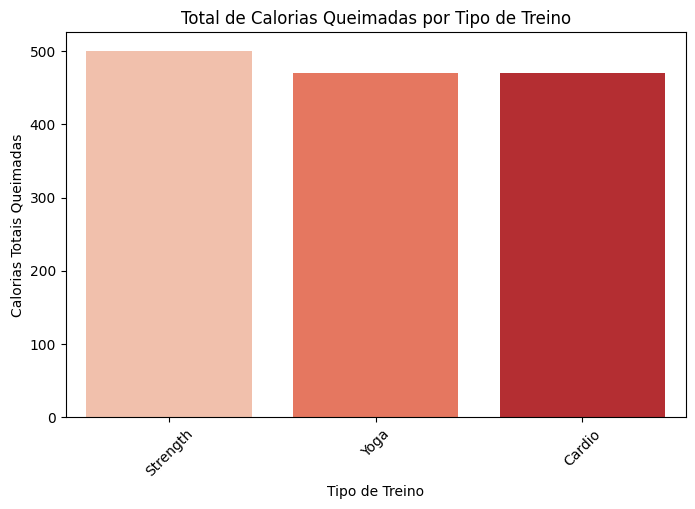

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x=calorias_por_treino.index, y=calorias_por_treino.values, palette="Reds")
plt.title("Total de Calorias Queimadas por Tipo de Treino")
plt.ylabel("Calorias Totais Queimadas")
plt.xlabel("Tipo de Treino")
plt.xticks(rotation=45)
plt.show()


🔹 2. Intensidade do Exercício vs. Frequência Cardíaca
Verificar se os treinos que elevam mais a frequência cardíaca resultam em maior queima de calorias.


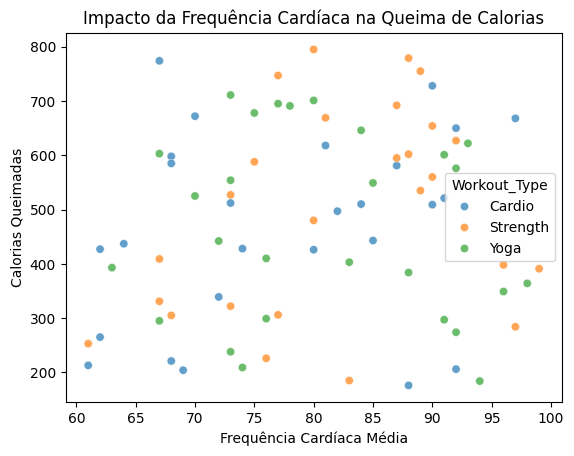

In [12]:
sns.scatterplot(data=fitness_tracker, x='Heart_Rate_avg', y='Calories_Burned', hue='Workout_Type', alpha=0.7)
plt.title('Impacto da Frequência Cardíaca na Queima de Calorias')
plt.xlabel('Frequência Cardíaca Média')
plt.ylabel('Calorias Queimadas')
plt.show()


 🔹3. Padrões ao Longo do Tempo

Analisar se há uma tendência de melhora nos resultados ao longo das semanas.

Identificar dias mais produtivos para treinos.

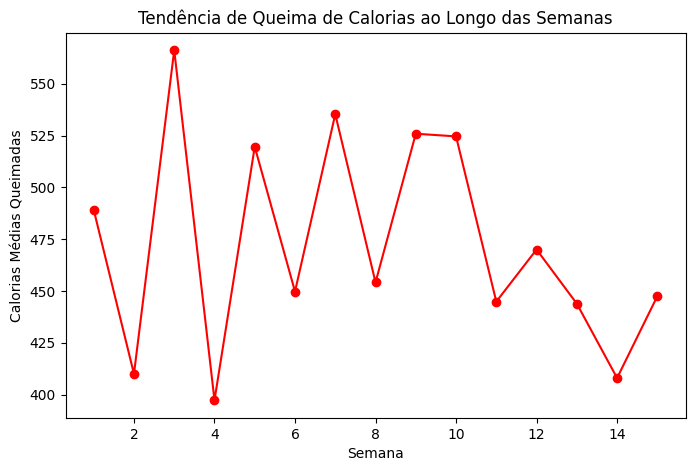

In [26]:
fitness_tracker['Week'] = fitness_tracker['Date'].dt.isocalendar().week
weekly_trend = fitness_tracker.groupby('Week')['Calories_Burned'].mean()


plt.figure(figsize=(8,5))
plt.plot(weekly_trend.index, weekly_trend.values, marker='o', linestyle='-', color='red')
plt.title("Tendência de Queima de Calorias ao Longo das Semanas")
plt.xlabel("Semana")
plt.ylabel("Calorias Médias Queimadas")
plt.show()



<ipython-input-27-ffc61950ba29>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_trend.index, y=daily_trend.values, palette='coolwarm')


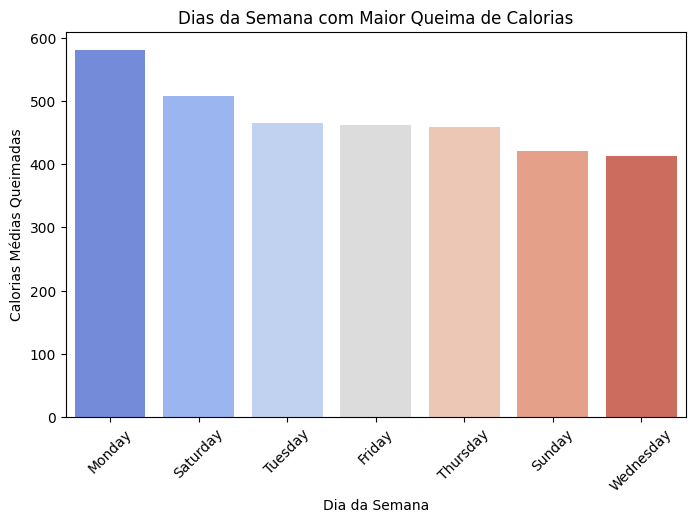

In [27]:
fitness_tracker['Day_of_Week'] = fitness_tracker['Date'].dt.day_name()
daily_trend = fitness_tracker.groupby('Day_of_Week')['Calories_Burned'].mean().sort_values(ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(x=daily_trend.index, y=daily_trend.values, palette='coolwarm')
plt.title("Dias da Semana com Maior Queima de Calorias")
plt.ylabel("Calorias Médias Queimadas")
plt.xlabel("Dia da Semana")
plt.xticks(rotation=45)
plt.show()


 🔹4. Passos, Frequência Cardíaca e Calorias Queimadas

Entender como a quantidade de passos afeta a queima de calorias verificar se caminhadas ou corridas de longa duração impactam mais a perda de peso ou não.


In [15]:
fitness_tracker.groupby('Workout_Type')[['Steps', 'Calories_Burned']].mean()

,Steps,Calories_Burned
Workout_Type,,
Cardio,8577.269231,469.538462
Strength,8198.192308,500.576923
Yoga,9417.037037,470.111111


<ipython-input-28-15df87681223>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Workout_Type', y='Calories_Burned', data=workout_data, palette='coolwarm')


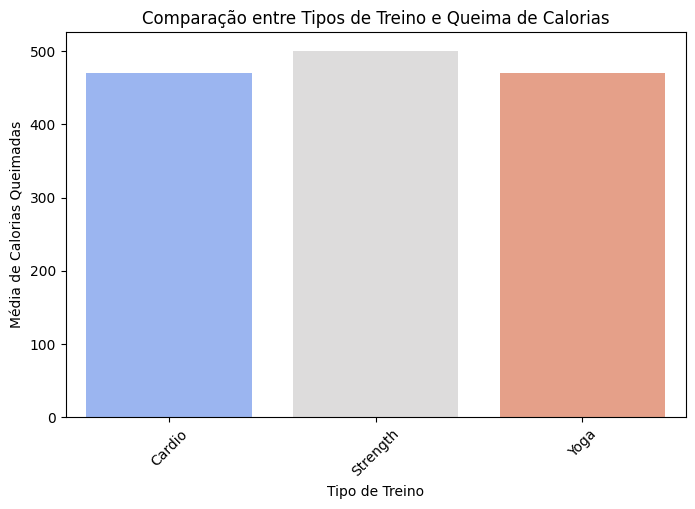

In [28]:
workout_data = fitness_tracker.groupby('Workout_Type')[['Steps', 'Calories_Burned']].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=workout_data, palette='coolwarm')
plt.title('Comparação entre Tipos de Treino e Queima de Calorias')
plt.ylabel('Média de Calorias Queimadas')
plt.xlabel('Tipo de Treino')
plt.xticks(rotation=45)
plt.show()


## 📌 Conclusão  

A análise revelou que o treino mais eficiente para queima de calorias é **Strength**, sendo responsável pelo maior gasto energético entre as atividades registradas. Além disso, observamos que a **segunda-feira (Monday)** é o dia da semana em que os usuários mais treinam, sugerindo que é um dia estratégico para iniciar a rotina com alto desempenho.  

Ao analisar a evolução dos treinos ao longo das semanas, identificamos que a partir da **2ª semana** ocorre o **melhor desempenho**, indicando uma tendência de progresso e adaptação ao longo do tempo. Esse insight reforça a importância da consistência nos treinos para alcançar resultados mais eficientes na perda de peso.  

Com esses dados, podemos ajustar estratégias para maximizar o impacto dos treinos e otimizar a progressão ao longo do tempo! 🚀🔥  


